# 0.4.2 Transformación de la variable pronósticada en regresión

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import QuantileTransformer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

## 0.4.2.1 Uso básico con funciones de usuario

https://www.youtube.com/watch?v=Kn6RS1FT9fQ

In [5]:

#
# Generación de la muestra de datos
#
X, y = make_regression(
    n_samples=300,
    n_features=1,
    n_targets=1,
    bias=150,
    noise=9.0,
    shuffle=False,
    random_state=123456,
)

argsort = np.argsort(X[:, 0])
X = X[argsort]
y = y[argsort]

y = np.exp(0.01 * y)

In [6]:
#
# Definición de una transformación simple
#
def target_transformer(x):
    return np.log(x)


def inverse_target_transformer(x):
    return np.exp(x)

In [10]:
linearRegression = LinearRegression()

regressor = TransformedTargetRegressor(
    # -------------------------------------------------------------------------
    # Regressor object
    regressor=linearRegression,
    # -------------------------------------------------------------------------
    # Function to apply to y before passing to fit.
    func=target_transformer,
    # -------------------------------------------------------------------------
    # Function to apply to the prediction of the regressor.
    inverse_func=inverse_target_transformer,
)

regressor.fit(X, y)

y_pred = regressor.predict(X)

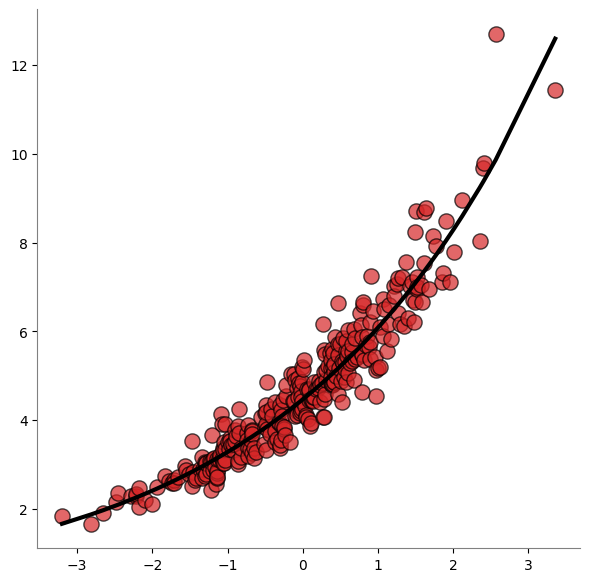

In [11]:

plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [12]:
#
# Fitted regressor.
#
regressor.regressor_

LinearRegression()

## 0.4.2.2 Uso con transformadores

In [14]:
#
# Realiza una transformación no lineal que mapea
# los datos a una distribucion normal
#
quantileTransformer = QuantileTransformer(
    n_quantiles=300,
    output_distribution="normal",
)

regressor = TransformedTargetRegressor(
    # -------------------------------------------------------------------------
    # Regressor object
    regressor=linearRegression,
    # -------------------------------------------------------------------------
    # Estimator object
    transformer=quantileTransformer,
)

regressor.fit(X, y)

y_pred = regressor.predict(X)

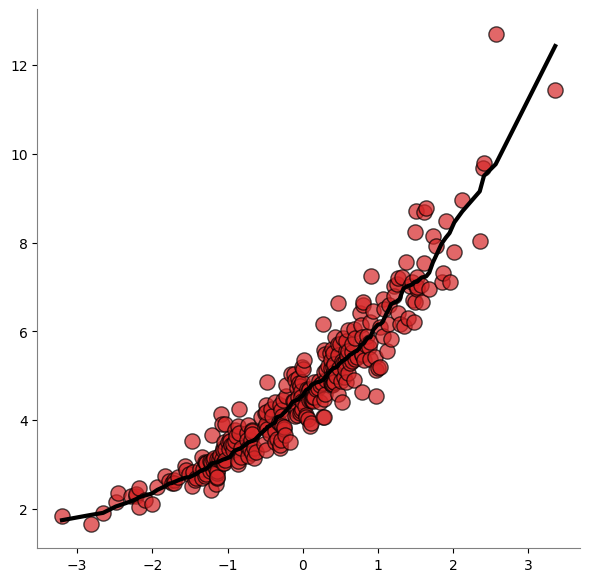

In [15]:
plt.figure(figsize=(7, 7))
plt.scatter(
    X[:, 0],
    y,
    color="tab:red",
    edgecolors="k",
    s=120,
    alpha=0.7,
)

plt.plot(
    X[:, 0],
    y_pred,
    color="k",
    linewidth=3,
)


plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [ ]:
print('ok_')